# LBT Demo: Block Sizes 16, 8, 4
Estudio del efecto del tamaño de bloque (Block Size `-B`) en el Learned Block Transform (LBT).

Este notebook ejecuta el codificador LBT con tres tamaños de bloque diferentes y muestra los resultados visuales y el tamaño de los archivos generados.

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
sys.path.append('../src')
from visualization import show_images


In [2]:
# Configuración de rutas
src_dir = '../src'
docs_dir = '../docs'
img_file = 'hor.jpg'
input_img = f'{docs_dir}/hor.jpg'

# Directorios de salida (rutas relativas al directorio src)
encoded_dir_rel = f'{docs_dir}/encoded'
decoded_dir_rel = f'{docs_dir}/decoded'

# Crear directorios si no existen
# Nota: Estamos en notebooks/, así que ../docs es la ruta relativa correcta
os.makedirs(f'../docs/encoded', exist_ok=True)
os.makedirs(f'../docs/decoded', exist_ok=True)

## 1. Bloque 16x16

main Namespace(debug=False, subparser_name='encode', block_size_DCT=16, color_transform='YCoCg', disable_subbands=False, quantizer='deadzone', QSS=16, entropy_image_codec='TIFF', original='../docs/hor.jpg', encoded='../docs/encoded/demo_B16', func=<function encode at 0x000002739EBBB740>)


(INFO) LBT: Imagen leída: forma=(3280, 4928, 3)
(INFO) entropy_image_coding: Written 1136997 bytes in ../docs/encoded/demo_B16.tif
(INFO) LBT: Codificación completada: tamaño salida = 1136997 bytes


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=16, color_transform='YCoCg', disable_subbands=False, quantizer='deadzone', QSS=16, filter='no_filter', entropy_image_codec='TIFF', encoded='../docs/encoded/demo_B16', decoded='../docs/decoded/demo_B16.jpg', func=<function decode at 0x000002D7F9FCAD40>)
205 308


(INFO) LBT: Decodificación completada: tamaño salida = 1033880 bytes


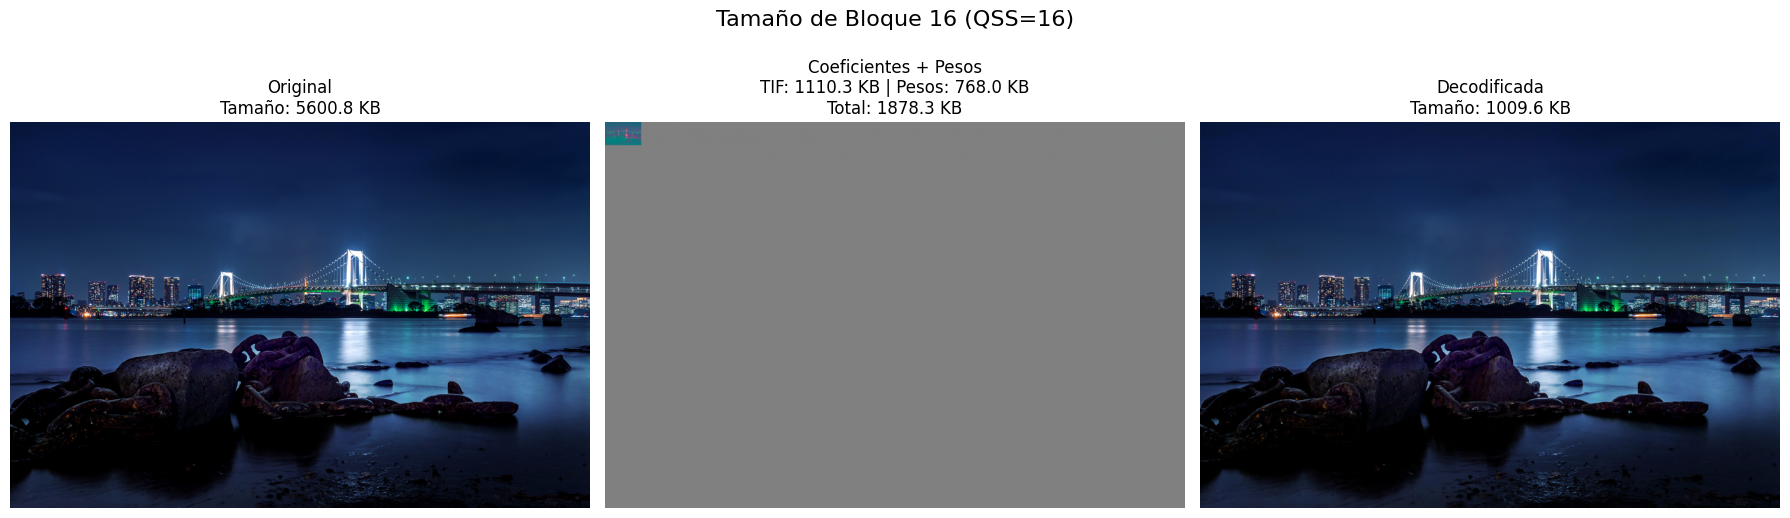

In [ ]:
# Tamaño de bloque 16x16
B = 16
qs = 16  # Quantization Step Size (controlar la calidad/compresión.)
enc_file = f'{encoded_dir_rel}/demo_B{B}'
dec_file = f'{decoded_dir_rel}/demo_B{B}.jpg'

# Ejecutar codificador y decodificador LBT
!cd {src_dir} && python LBT.py encode -o {input_img} -e {enc_file} -B {B} -q {qs}
!cd {src_dir} && python LBT.py decode -e {enc_file} -d {dec_file} -B {B} -q {qs}

# Mostrar resultados visuales (las rutas son relativas al notebook)
show_images(f'../docs/{img_file}', f'../docs/encoded/demo_B{B}.tif', f'../docs/decoded/demo_B{B}.jpg', f'Tamaño de Bloque {B} (QSS={qs})')

## 2. Bloque 8x8 (Estándar)

main Namespace(debug=False, subparser_name='encode', block_size_DCT=8, color_transform='YCoCg', disable_subbands=False, quantizer='deadzone', QSS=16, entropy_image_codec='TIFF', original='../docs/hor.jpg', encoded='../docs/encoded/demo_B8', func=<function encode at 0x00000256DB65B740>)


(INFO) LBT: Imagen leída: forma=(3280, 4928, 3)
(INFO) entropy_image_coding: Written 1161843 bytes in ../docs/encoded/demo_B8.tif
(INFO) LBT: Codificación completada: tamaño salida = 1161843 bytes


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=8, color_transform='YCoCg', disable_subbands=False, quantizer='deadzone', QSS=16, filter='no_filter', entropy_image_codec='TIFF', encoded='../docs/encoded/demo_B8', decoded='../docs/decoded/demo_B8.jpg', func=<function decode at 0x0000027B63F7AD40>)
410 616


(INFO) LBT: Decodificación completada: tamaño salida = 1039036 bytes


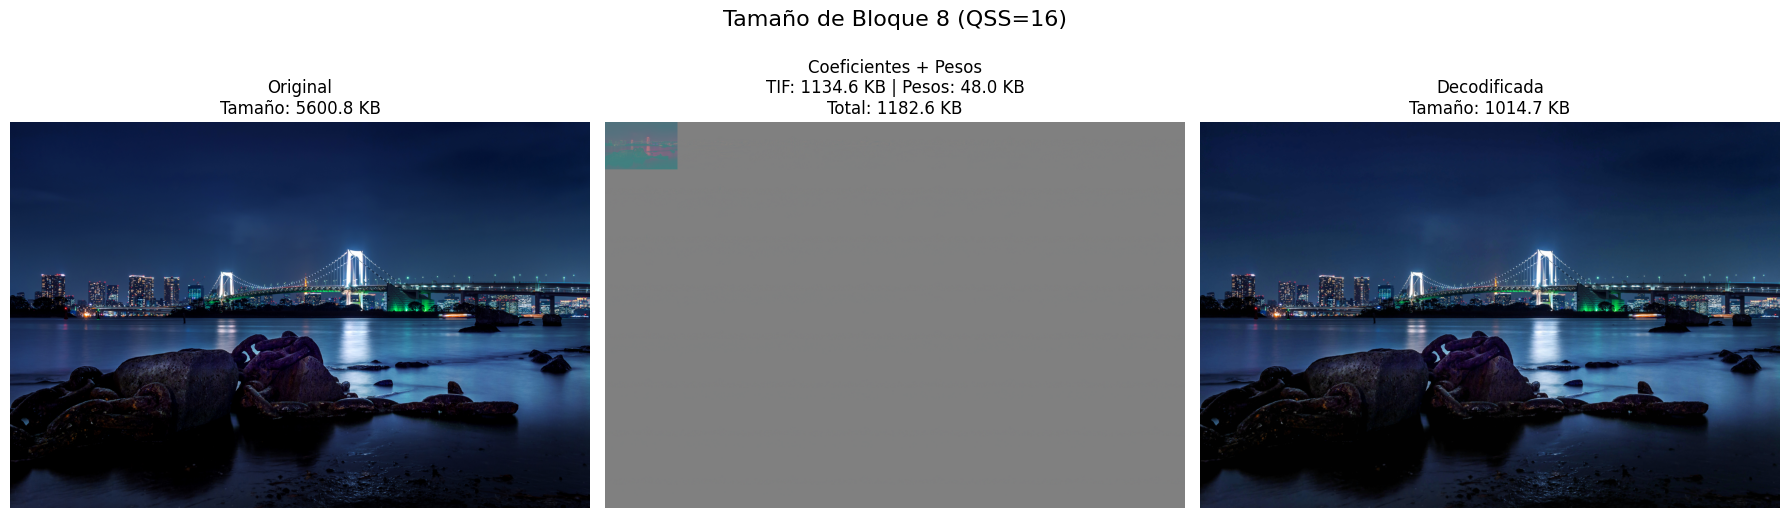

In [8]:
# Tamaño de bloque 8x8 (estándar en compresión de imágenes, como en JPEG)
B = 8
enc_file = f'{encoded_dir_rel}/demo_B{B}'
dec_file = f'{decoded_dir_rel}/demo_B{B}.jpg'

# Ejecutar codificador y decodificador LBT
!cd {src_dir} && python LBT.py encode -o {input_img} -e {enc_file} -B {B} -q {qs}
!cd {src_dir} && python LBT.py decode -e {enc_file} -d {dec_file} -B {B} -q {qs}

# Mostrar y comparar resultados
show_images(f'../docs/{img_file}', f'../docs/encoded/demo_B{B}.tif', f'../docs/decoded/demo_B{B}.jpg', f'Tamaño de Bloque {B} (QSS={qs})')

## 3. Bloque 4x4

main Namespace(debug=False, subparser_name='encode', block_size_DCT=4, color_transform='YCoCg', disable_subbands=False, quantizer='deadzone', QSS=16, entropy_image_codec='TIFF', original='../docs/hor.jpg', encoded='../docs/encoded/demo_B4', func=<function encode at 0x000001EB6F0AB740>)


(INFO) LBT: Imagen leída: forma=(3280, 4928, 3)
(INFO) entropy_image_coding: Written 1300024 bytes in ../docs/encoded/demo_B4.tif
(INFO) LBT: Codificación completada: tamaño salida = 1300024 bytes
(INFO) LBT: Decodificación completada: tamaño salida = 1214584 bytes


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=4, color_transform='YCoCg', disable_subbands=False, quantizer='deadzone', QSS=16, filter='no_filter', entropy_image_codec='TIFF', encoded='../docs/encoded/demo_B4', decoded='../docs/decoded/demo_B4.jpg', func=<function decode at 0x000001CB16AFAD40>)
820 1232


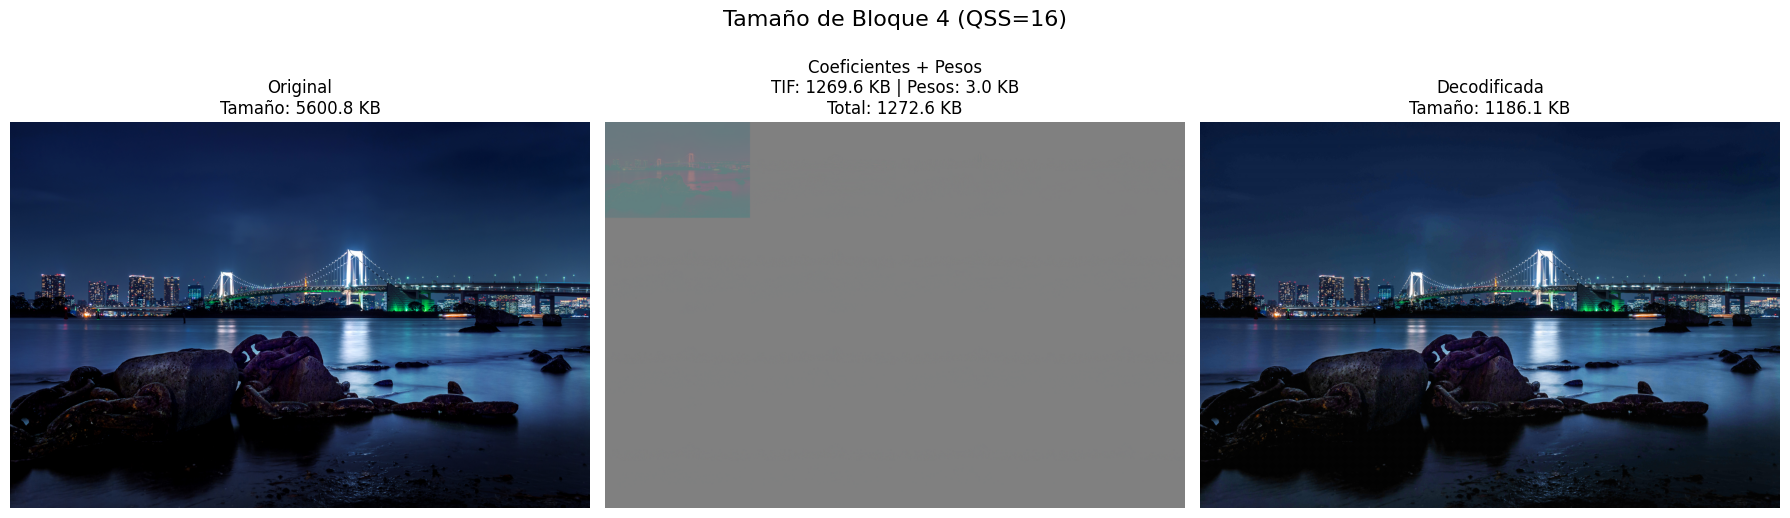

In [9]:
# Tamaño de bloque 4x4 (bloques más pequeños, mayor complejidad computacional)
B = 4
enc_file = f'{encoded_dir_rel}/demo_B{B}'
dec_file = f'{decoded_dir_rel}/demo_B{B}.jpg'

# Ejecutar codificador y decodificador LBT
!cd {src_dir} && python LBT.py encode -o {input_img} -e {enc_file} -B {B} -q {qs}
!cd {src_dir} && python LBT.py decode -e {enc_file} -d {dec_file} -B {B} -q {qs}

# Mostrar y comparar resultados
show_images(f'../docs/{img_file}', f'../docs/encoded/demo_B{B}.tif', f'../docs/decoded/demo_B{B}.jpg', f'Tamaño de Bloque {B} (QSS={qs})')